Hotel Booking Data cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as pre      # for min_max scaling
from matplotlib import style
from matplotlib import colors
%matplotlib inline

df=pd.read_csv('hotel_bookings.csv')

#this tells us missing values in each col
miss=df.isnull().sum(axis=0)      
miss

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [3]:
#replacing vals in cols. 'children', 'company', 'agent' with mean of cols.
df['children'].fillna(df['children'].mean(), inplace=True)
df['agent'].fillna(df['agent'].mean(), inplace=True)
df['company'].fillna(df['company'].mean(), inplace=True)

#converting months in col. to numbers

df['arrival_date_month']= (df['arrival_date_month'].str.strip()).str.lower()
cal = {'january':1, 'february':2, 'march':3, 'april':4, 'may':5, 'june':6, 'july':7, 'august':8, 'september':9, 'october':10, 'november':11, 'december':12}
df['arrival_date_month']= df['arrival_date_month'].map(cal )


#combining year, month, date to datetime obj.
cols=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
df['arrival_date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)
df['arrival_date']=pd.to_datetime(df['arrival_date'])

In [4]:
#replacing reservation status w/ discrete int. vals.

df['reservation_status'] = df['reservation_status'].apply(lambda x: 0 if x=='Canceled' else 1)

#dropping redundant cols.
df=df.drop(['customer_type', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'meal', 'previous_bookings_not_canceled', 'arrival_date_week_number', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1)

#no missing vals. now
miss=df.isnull().sum(axis=0)      
miss

hotel                          0
is_canceled                    0
lead_time                      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
is_repeated_guest              0
previous_cancellations         0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
agent                          0
company                        0
days_in_waiting_list           0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
arrival_date                   0
dtype: int64

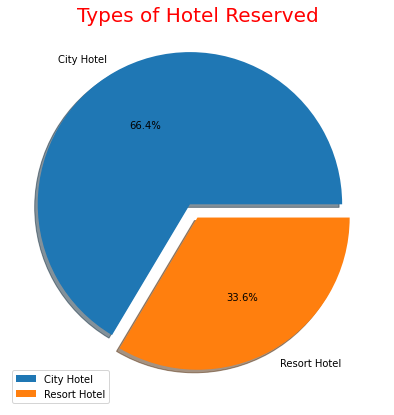

In [5]:
temp=pd.DataFrame({'Hotel': df['hotel']})
count=temp.value_counts()
labels=[X[0] for X in count.keys()]
bar, x=plt.subplots(figsize=(12, 7))
explode=(0.1, 0)
ax=plt.pie(x=count, explode=explode, autopct='%.1f%%', labels=labels, shadow=True)
plt.title('Types of Hotel Reserved', fontsize=20, color='r')
plt.legend()
plt.show()


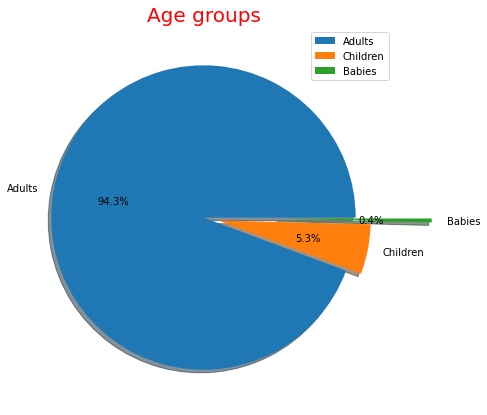

In [6]:
vals=[sum(df['adults']), sum(df['children']), sum(df['babies'])]
labels=['Adults', 'Children', 'Babies']
bar, x=plt.subplots(figsize=(12, 7))
ax=plt.pie(vals, autopct='%.1f%%', labels=labels, shadow=True ,explode=(0, 0.1, 0.5))
plt.title('Age groups', fontsize=20, color='r')
plt.legend()
plt.show()

No handles with labels found to put in legend.


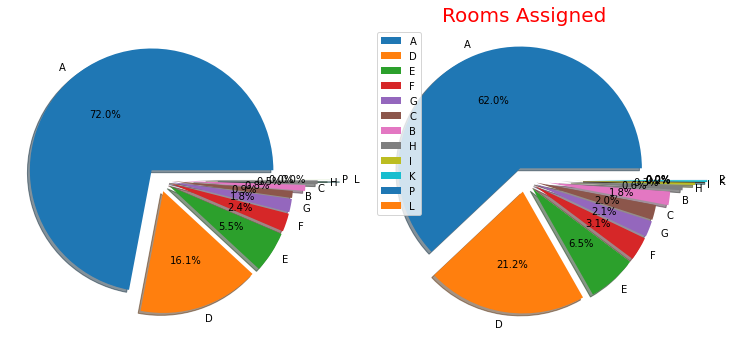

In [7]:
temp=df['reserved_room_type']
count=temp.value_counts()
labels=[X[0] for X in count.keys()]
fig, axes=plt.subplots(1, 2, figsize=(12, 7))
explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5)
axes[0].pie(x=count, autopct='%.1f%%', explode=explode, labels=labels, shadow=True)
plt.legend()

temp=df['assigned_room_type']
count=temp.value_counts()
labels=[X[0] for X in count.keys()]
#fig, axes=plt.subplots(1, 2, 2)
explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.5)
axes[1].pie(x=count, autopct='%.1f%%', explode=explode, labels=labels, shadow=True)
axes[0].set_title('Rooms Reserved', fontsize=20, color='w')
axes[1].set_title('Rooms Assigned', fontsize=20, color='r')
plt.legend()
plt.show()


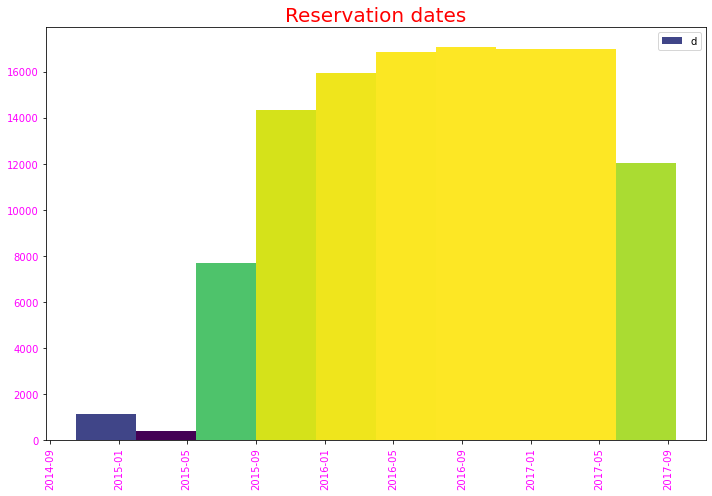

In [8]:
data=df.loc[:, 'reservation_status_date']
data=pd.to_datetime(data)
fig, ax=plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)
N, bins, patches = ax.hist(data )
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.xticks(rotation=90, color='magenta')
plt.yticks(color='magenta')
plt.legend('distribution')
plt.title('Reservation dates', fontsize=20, color='r')
plt.show()

In [ ]:
cols=['hotel', 'reservation_status_date', 'reserved_room_type', 'assigned_room_type', 'arrival_date']
df1=df[cols]
df=df.drop(cols, axis=1)

#SCALING & NORMALIZTION

#Scaling using MinMaxScaler range=[0, 1]
scaler=pre.MinMaxScaler().fit_transform(df)
df=pd.DataFrame(scaler, columns=df.columns)

#Normalization using StandardScaler mean=0, std=1
scaler1=pre.StandardScaler().fit_transform(df)
df=pd.DataFrame(scaler1, columns=df.columns)


df=pd.concat([df, df1] ,axis=1)

df.to_csv('Hotel Booking Data cleaning.csv')
df.head(10)